# Google Colab Prep work 


1.   Install Kaggle python module 
2.   Import the Kaggle Data set from JSON auth file and URL
3.   Make the internal structure that Google Drive needs under /content 
4.   Unpack the kaggle zip file under /content 




In [ ]:
# References 
# https://www.kaggle.com/general/74235
# https://www.kaggle.com/competitions/plant-pathology-2021-fgvc8/overview

! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
# Need to download the Kaggle Dataset 
# files.upload()

In [ ]:
 # ! mkdir ~/.kaggle

In [ ]:
# ! cp kaggle.json ~/.kaggle/

In [ ]:
 # ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# This is a helpful command to list what is available (top recents) in Kaggle, left for FYI 
# ! kaggle datasets list

In [ ]:
# ! kaggle competitions download -c plant-pathology-2021-fgvc8

In [ ]:
# ! mkdir plant_pathology_data


In [ ]:
# Unzip the Kaggle competition file into the cloud (around 15 GB in size)
# ! unzip /content/plant-pathology-2021-fgvc8.zip -d plant_pathology_data


In [1]:
# Mount Google Drive that was imported from kaggle zip file import/unpack 
# https://gist.github.com/kelly-sovacool/c33b64b70164be37d75bd40c9b56b498

# Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True)
from google.colab import drive
# drive.mount('/content/plant_pathology_data', force_remount=True)
drive.mount('/content/plant_pathology_data')

Mounted at /content/plant_pathology_data


In [2]:
import os
import tensorflow as tf

import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

image_path = "/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/train_images"

def loadImages(path):
    '''
      Put files into lists and return them as one list with all images in the folder
    '''
    image_files = sorted([
                          os.path.join(path, file)
                          for file in os.listdir(path)
                          if file.endswith('.jpg')
                        ])
    return image_files

image_files = loadImages(image_path)
type(image_files)
# ran 1 minute 26 seconds 

list

This is the length of the total list we are working with 18799
This is the image_files list object type: <class 'list'>
This is the original image.shape: (2672, 4000, 3)


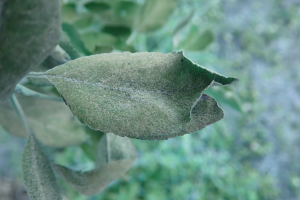

This is the resized_image.shape: (200, 300, 3)


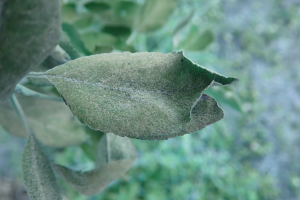

This is the original image.shape: (2672, 4000, 3)


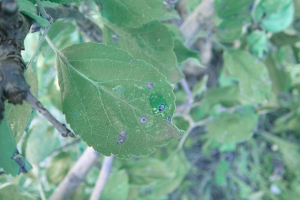

This is the resized_image.shape: (200, 300, 3)


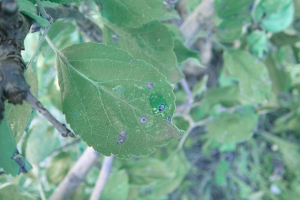

This is the original image.shape: (2672, 4000, 3)


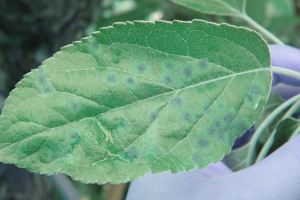

This is the resized_image.shape: (200, 300, 3)


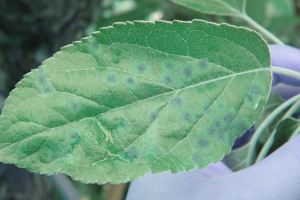

This is the original image.shape: (2672, 4000, 3)


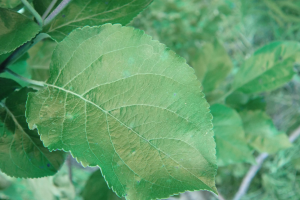

This is the resized_image.shape: (200, 300, 3)


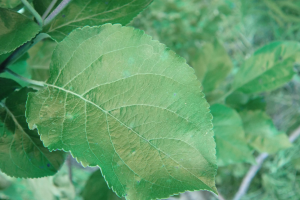

This is the original image.shape: (2672, 4000, 3)


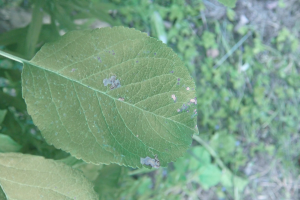

This is the resized_image.shape: (200, 300, 3)


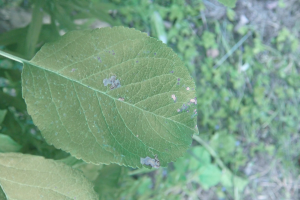

This is the original image.shape: (2672, 4000, 3)


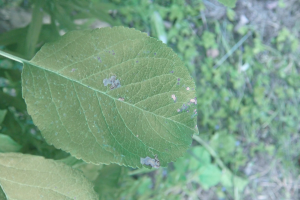

This is the resized_image.shape: (200, 300, 3)


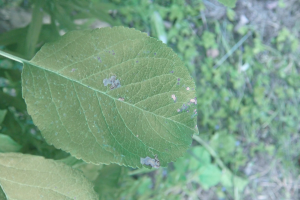

This is the original image.shape: (3000, 4000, 3)


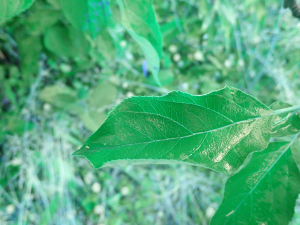

This is the resized_image.shape: (225, 300, 3)


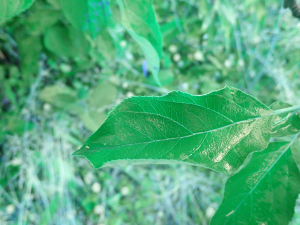

This is the original image.shape: (1728, 2592, 3)


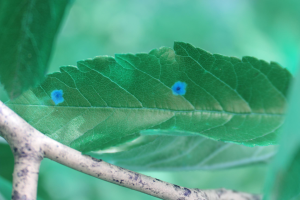

This is the resized_image.shape: (200, 300, 3)


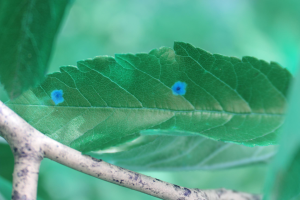

This is the original image.shape: (2672, 4000, 3)


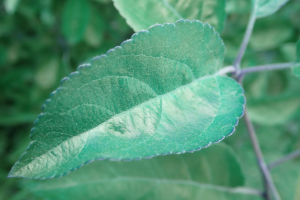

This is the resized_image.shape: (200, 300, 3)


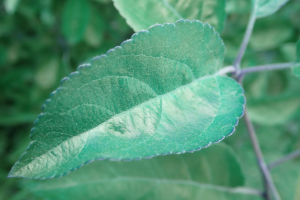

This is the original image.shape: (2672, 4000, 3)


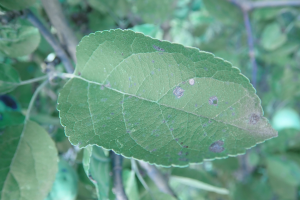

This is the resized_image.shape: (200, 300, 3)


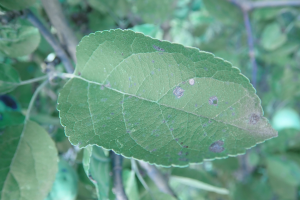

This is the original image.shape: (2672, 4000, 3)


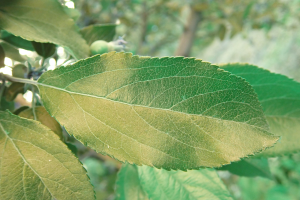

This is the resized_image.shape: (200, 300, 3)


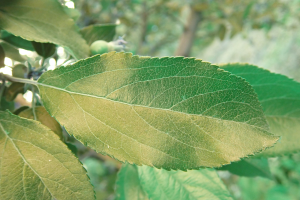

This is the original image.shape: (2672, 4000, 3)


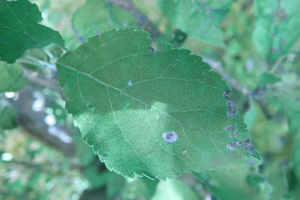

This is the resized_image.shape: (200, 300, 3)


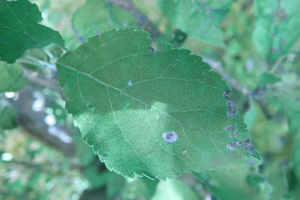

This is the original image.shape: (2672, 4000, 3)


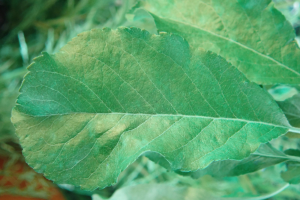

This is the resized_image.shape: (200, 300, 3)


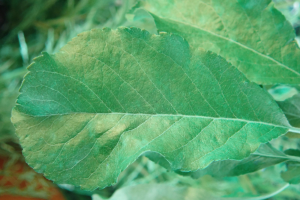

This is the original image.shape: (2672, 4000, 3)


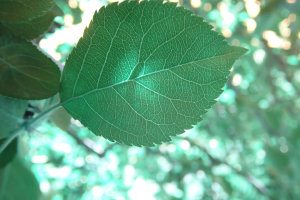

This is the resized_image.shape: (200, 300, 3)


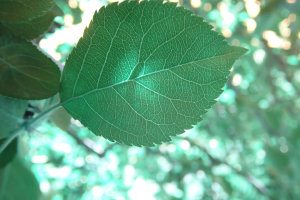

This is the original image.shape: (2672, 4000, 3)


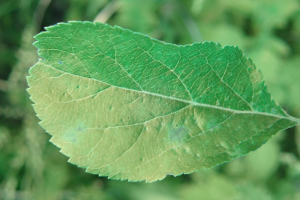

This is the resized_image.shape: (200, 300, 3)


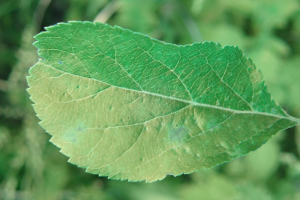

This is the original image.shape: (2672, 4000, 3)


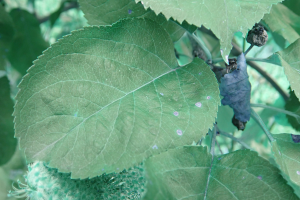

This is the resized_image.shape: (200, 300, 3)


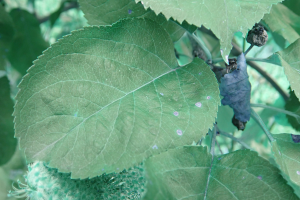

This is the original image.shape: (2672, 4000, 3)


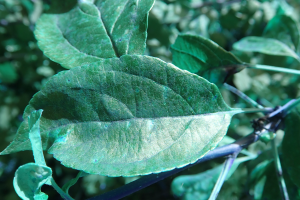

This is the resized_image.shape: (200, 300, 3)


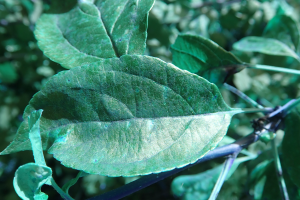

This is the original image.shape: (2672, 4000, 3)


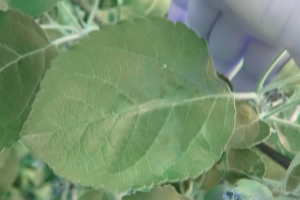

This is the resized_image.shape: (200, 300, 3)


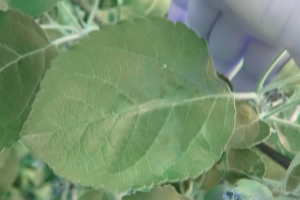

This is the original image.shape: (2672, 4000, 3)


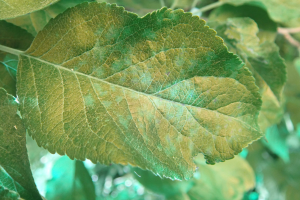

This is the resized_image.shape: (200, 300, 3)


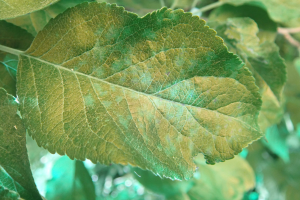

This is the original image.shape: (2672, 4000, 3)


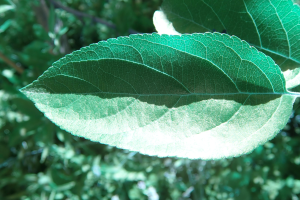

This is the resized_image.shape: (200, 300, 3)


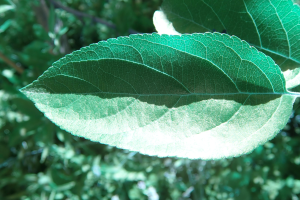

In [8]:
# Import some standard libraries
import doctest
import copy

# Import external libraries
import numpy
import cv2
from skimage import io
from google.colab.patches import cv2_imshow

# Not sure if this is needed anymore 
from google.colab import files

from skimage import io
# Not sure if I need this yet -- imutils seems like the other vis methods 
import imutils

# image_path = "/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/train_images"

# file ="800113bb65efe69e.jpg"
# image_files = [os.path.join(image_path, file)]
print(f"This is the length of the total list we are working with {len(image_files)}")
print(f"This is the image_files list object type: {type(image_files)}")

for image in image_files[:20]:
  image = io.imread(image) 
  # cv2_imshow(image) # original image 
  print(f"This is the original image.shape: {image.shape}")
  # print(f"This is the second element of original image.shape:  {image.shape[1]}")
  # plt.imshow(image)
  pixels_height = 300
  r = pixels_height / image.shape[1]
  # print(f"This is the pixels aspect ratio for resize using {pixels_height}: {r}")
  dim = (pixels_height, int(image.shape[0] * r))
  # print(f"This is the dimension for resize: {dim}")
  resized = cv.resize(image, dim, interpolation=cv.INTER_AREA)
  cv2_imshow(resized)
  resized_image = imutils.resize(image, width=300)
  print(f"This is the resized_image.shape: {resized_image.shape}")
  cv2_imshow(resized_image)

# Read in the CSV files for EDA of Kaggle Plant Pathology 2021 Foliar 



1.   Read the file into pandas data frame
2.   Describe the datatypes and get the overall stats and metadata info 
3.   Get the top ranking files from top 6 categories for image sampling and viz
     * Depends on being able to translate the Google file location for those images or me "faking it" by making 6 sub directories with copies of those files ;-D 

## Image EDA 
1.   Do some basic stuff
      * Basic visual of the thumbnail pictures (not full size)
      * Histogram of the pixels in those sample thumbnails 
      * RGB graphs of their color distributions 
      * Try converting to grayscale to see if any changes in 
          * histogram of grayscale 
      * There may be a few more ideas that come out of this EDA -- this is the placeholder for that



In [9]:
import pandas as pd
# Google has some odd ways of servicing a URL 
# - just like image the file needs uc?=id prepended 
# - to pull in the file in a way it can be injested by the notebook Python pandas code 
url='https://drive.google.com/file/d/1ztrRUJ7dT68fRTuuP4htI3ZziUx87A5B/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
print(url)
train_df = pd.read_csv(url)

https://drive.google.com/uc?id=1ztrRUJ7dT68fRTuuP4htI3ZziUx87A5B


In [ ]:
train_df.describe()

image labels
count                  18632  18632
unique                 18632     12
top     800113bb65efe69e.jpg   scab
freq                       1   4826

In [ ]:
train_df.head(10)

image                           labels
0  800113bb65efe69e.jpg                          healthy
1  8002cb321f8bfcdf.jpg  scab frog_eye_leaf_spot complex
2  80070f7fb5e2ccaa.jpg                             scab
3  80077517781fb94f.jpg                             scab
4  800cbf0ff87721f8.jpg                          complex
5  800edef467d27c15.jpg                          healthy
6  800f85dc5f407aef.jpg                             rust
7  801d6dcd96e48ebc.jpg                          healthy
8  801f78399a44e7af.jpg                          complex
9  8021b94d437eb7d3.jpg                          healthy

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18632 entries, 0 to 18631
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   18632 non-null  object
 1   labels  18632 non-null  object
dtypes: object(2)
memory usage: 291.2+ KB


In [ ]:
train_df['labels'].value_counts()

scab                               4826
healthy                            4624
frog_eye_leaf_spot                 3181
rust                               1860
complex                            1602
powdery_mildew                     1184
scab frog_eye_leaf_spot             686
scab frog_eye_leaf_spot complex     200
frog_eye_leaf_spot complex          165
rust frog_eye_leaf_spot             120
rust complex                         97
powdery_mildew complex               87
Name: labels, dtype: int64

In [ ]:
main_labels = pd.Series(
    ['scab',
    'healthy',
    'frog_eye_leaf_spot',
    'rust',
    'complex',
    'powdery_mildew'],
    dtype='category'
)

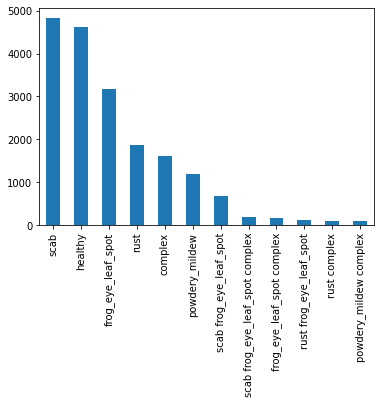

In [ ]:
train_df['labels'].value_counts().plot(kind='bar');

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
 
scab_urls =[
    "https://drive.google.com/uc?id=1vR2LMp7Fa5u92dNwCAzGPiimhppxeJt7",
    "https://drive.google.com/uc?id=1ukpCgUgZHAWF1wtpRHl_5QN02yFyvV2P",
    "https://drive.google.com/uc?id=1eOjLsac9oHy_Hd1No438E5T2JzUFcyu6",
    "https://drive.google.com/uc?id=1O2Dgs8PvAQTPSWAmh1GIZNaVnDt_3XDa",
    "https://drive.google.com/uc?id=1JMfDAr6ibxgfqWH1KY54t06Z0ux7nPe5",
    "https://drive.google.com/uc?id=1TKfdMsoesqZlJmiNEL7DWcsT3Kc62fJ5",
    "https://drive.google.com/uc?id=1fR-uR2eBYPMO9nWs5XGc9uBI3Rs-esmA",
    "https://drive.google.com/uc?id=1CjcUifaF-5q1dfwbZJTfVLbt5f1FoXKS",
    "https://drive.google.com/uc?id=1kMJJBJi5SDiElBqfTeJGkspRUZHMyruz",
    "https://drive.google.com/uc?id=1O4DjSbULRoUZ74dBveO8cVnIRKkhUrlK"
  ]

powdery_urls =[
    "https://drive.google.com/uc?id=18cBTdDr_b1ET-kngboRTKqzMp7uuLsAI",
    "https://drive.google.com/uc?id=1JrK_IbXwdfG1WnnurmcSkmhqq_QoysbG",
    "https://drive.google.com/uc?id=1qG1gXZqTbrfA1WvZBkkCz28n43rZiQiD",
    "https://drive.google.com/uc?id=1kKF2nkYr2CkooTyqXAxDYTMrs69mbxll",
    "https://drive.google.com/uc?id=1sXofHewK_iSv7dmvmsvAclCR87SI4NZu",
    "https://drive.google.com/uc?id=1u0VZDCkTLO8lpf3upCuvActYpPFrTNQq",
    "https://drive.google.com/uc?id=1hi5hN6PQpokQSxZZZmYia9vp_7ZJFxfW",
    "https://drive.google.com/uc?id=1dhy9ehlQNGty4CFZk4_mCS70a68nMX9j",
    "https://drive.google.com/uc?id=1GOIgU15q4M-if6CrrQ3HA7t0X5bC1C3f"
  ]

complex_urls =[
    "https://drive.google.com/uc?id=1YlLWJPAkSDpO-m75a5HA6TWiqfcs4JAM",
    "https://drive.google.com/uc?id=1ABe9rgxLecVZNTj1xKG7sg1Er4HI7IBN",
    "https://drive.google.com/uc?id=1TUJuw08S9j7zAX081HfjPuWguxX_C7Te",
    "https://drive.google.com/uc?id=178Ld8bUJyY7R2btsdj8Aa83PjxaLDkuE",
    "https://drive.google.com/uc?id=1MDLwRz4xdQNF0CrP93Zr5bZvsC6ezk5j",
    "https://drive.google.com/uc?id=1bWGQxszJQ1EZtzPI-5NO122uACtXoowV",
    "https://drive.google.com/uc?id=16uDRBOuM9nwaQvvLScnx9EWnpZcnObOF",
    "https://drive.google.com/uc?id=1Tk4TeD_VZ9Vz1_ixqLjoO7J_hw0SAA7J",
    "https://drive.google.com/uc?id=1DkzJUhsMQdtnH0n9Yy0Koxw0hyYFeFKa",
    "https://drive.google.com/uc?id=1XjECrjZZlMzmR3B1cWhkSqQdxVAD6qI6"
]

frog_eye_urls =[
    "https://drive.google.com/uc?id=1j33D0a9WU6q5fpsisozDST_QNS2_impK",
    "https://drive.google.com/uc?id=1iXg7Cu_n0rpbxptYFSx0743WjVsgTDkO",
    "https://drive.google.com/uc?id=1pidMSr7ZWAypencK84EEYNRD0C7pkanv",
    "https://drive.google.com/uc?id=1g4F_Bod8say2sIzf-UKB6c867DOUDlCq",
    "https://drive.google.com/uc?id=1_jBjiJBJn478obLoOacKf_VeAUzB1YsD",
    "https://drive.google.com/uc?id=1obxU2j6_0QpfK31BnahydEcnx5LihsRB",
    "https://drive.google.com/uc?id=1MR14dFP76iL_y64vpUhjkMZRmu-PsGGy",
    "https://drive.google.com/uc?id=1pNr1F3F3dG3K9WYTMFSa-vXKgn79_KBd",
    "https://drive.google.com/uc?id=1QMTFd2vXafilN02cPDzONVITzjgLdvmR",
    "https://drive.google.com/uc?id=1PChh_3xc8sZqYJqpHVt-TcNTB9FER66y"              
]

healthy_urls =[
    "https://drive.google.com/uc?id=1v2Jz6qczB04QK6P_kSIm8xb4W6m2fWwU",
    "https://drive.google.com/uc?id=1hMZJQk_VoCP3QN5WB2HmEmbORTHYJj40",
    "https://drive.google.com/uc?id=1FVA9ObY8ALJTRAZQ7MaHtsvmcTCrtFpl",
    "https://drive.google.com/uc?id=1QXg0HxIoWklyxNoqHC3HUMpfXMPEoSLw",
    "https://drive.google.com/uc?id=1CvYeSx1hL-2jy57khrvGtJbJr5_Z2H8a",
    "https://drive.google.com/uc?id=1QeYRR36s0IKJNwcpBzDEyAmQr9aaOwSW",
    "https://drive.google.com/uc?id=1oq0nf0J9Dh1fpbeg8Vk00e5nR2azaA2m",
    "https://drive.google.com/uc?id=1U3GuMOiMfm9Paqj-SSJHD1p8AC9_GQbH",
    "https://drive.google.com/uc?id=1snReW5-s9OAaI8o6hTtAWQcNUw-2xR8f",
    "https://drive.google.com/uc?id=1gTwLsAo93Oiw5xhtLv_8sBooozEH_T8-"             
]

rust_urls =[ 
    "https://drive.google.com/uc?id=14_7h_NIoKKoLZojeTAnhOwpmiR9fBtdM",
    "https://drive.google.com/uc?id=1kwgVJ95X5Dt9LG1echf7tSHUHKknj3SI",
    "https://drive.google.com/uc?id=1QaS5YgoG50hvx30mAHEaQcZcW_tv2zv3",
    "https://drive.google.com/uc?id=1qzMFE-LL3zIGOoSbNf880gSTLgRg2eEt",
    "https://drive.google.com/uc?id=15Vw2haNrKwomt0exagGJaT1etAxozrHZ",
    "https://drive.google.com/uc?id=16GIIEDdYV_EhB4OalKbIzH_9_NQXYFfA",
    "https://drive.google.com/uc?id=1rDY2mrHoOJIVjyemhAaA7M77q2zOXJSM",
    "https://drive.google.com/uc?id=1PjkYKi-lvy_-ANZlMbsJyyD9ka-qdzuD",
    "https://drive.google.com/uc?id=1GJ1T56EiWXB63EklPPG4hSIvXTHxbp49",
    "https://drive.google.com/uc?id=1vAcPkC2ujKa4cJkqEx5wNkS9yH2egc9F"   
]

In [ ]:
import os
import tensorflow as tf

import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

image_path = "/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/train_images"

def loadImages(path):
    '''
      Put files into lists and return them as one list with all images in the folder
    '''
    image_files = sorted([
                          os.path.join(path, file)
                          for file in os.listdir(path)
                          if file.endswith('.jpg')
                        ])
    return image_files

image_files = loadImages(image_path)
type(image_files)



# Kaggle Image Notes/Plan to help drive the project:  

0. Mission statement will help drive this (Matthew)
1. There will need to be a map of image to gdrive location (Heidi - proving to be a problem for EDA -- created a sample list of 60 to preview) 
2. There will need to have some establishment of a baseline to compare 
3. That baseline will have to be evaluated for "accuracy" in our model 
4. Anything else ?

## Mounting the drive requires my temporary Google OAuth to run things
The file that is complete path list of the mounted shared drive path to the train images is https://drive.google.com/file/d/1QXxduWuLJUrw_du_e5qG0gpR6jmh07-f/view?usp=sharing



In [1]:
import pandas as pd
# Google has some odd ways of servicing a URL 
# - just like image the file needs uc?=id prepended 
# - to pull in the file in a way it can be injested by the notebook Python pandas code 
url='https://drive.google.com/file/d/1B4PKWvmoIyMseTUUdh0OP1tF9kVK5nwI/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
print(url)
google_drive_path_df = pd.read_csv(url)
# google_drive_path_df.rename(columns={'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/train_images/image': 'jpg'}, inplace=True)

https://drive.google.com/uc?id=1B4PKWvmoIyMseTUUdh0OP1tF9kVK5nwI


In [2]:
google_drive_path_df.head()

image                           labels  \
0                 image                           labels   
1  800113bb65efe69e.jpg                          healthy   
2  8002cb321f8bfcdf.jpg  scab frog_eye_leaf_spot complex   
3  80070f7fb5e2ccaa.jpg                             scab   
4  80077517781fb94f.jpg                             scab   

                                          image_path  
0  /content/plant_pathology_data/MyDrive/plant_pa...  
1  /content/plant_pathology_data/MyDrive/plant_pa...  
2  /content/plant_pathology_data/MyDrive/plant_pa...  
3  /content/plant_pathology_data/MyDrive/plant_pa...  
4  /content/plant_pathology_data/MyDrive/plant_pa...


# EDA steps for visuals for graphs 

###  Reference [Colab CV example ](https://colab.research.google.com/drive/1yX8CKuS9tJAp7jtINrxusrHmekFoG4v0#scrollTo=Tz7UAjxjfMuz)

1.   Take the top 6 categories of images and evaluate them as groups (COMPLETE)
2.   Then come up for some ways to validate the patterns visually with RGB graphs for them (COMPLETE)
* For later, overlap healthy with each non healthy group for the top 6 categories 
3. Anything else we can think of? 




In [ ]:
# This can made into a function to make it more dry -- could not get to it for deadline today because of Google Drive mapping 
for url in all_urls:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)

In [ ]:
# histogram of distribution of RGB values 

plt.hist(healthy_image.ravel(),bins = 256, range = [0,256]) 
plt.show()

# Display the histogram of R, G, B channel  
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([healthy_image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

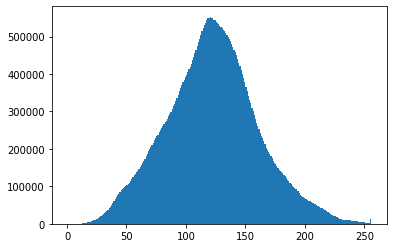

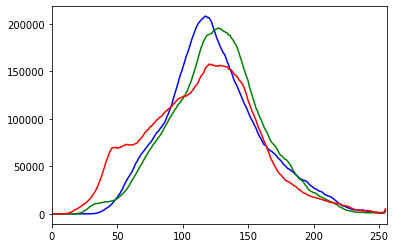

In [ ]:
# histogram of distribution of RGB values 

plt.hist(rust_image.ravel(),bins = 256, range = [0,256]) 
plt.show()

# Display the histogram of R, G, B channel  
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([rust_image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

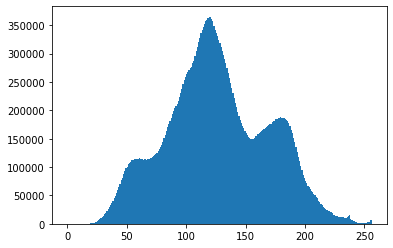

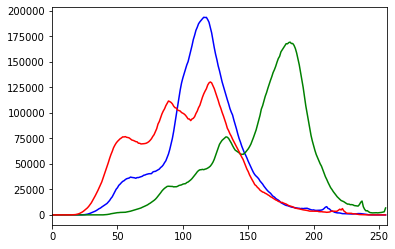

In [ ]:
# histogram of distribution of RGB values 

plt.hist(frog_eye_image.ravel(),bins = 256, range = [0,256]) 
plt.show()

# Display the histogram of R, G, B channel  
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([frog_eye_image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
# histogram of distribution of RGB values 

plt.hist(complex_image.ravel(),bins = 256, range = [0,256]) 
plt.show()

# Display the histogram of R, G, B channel  
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([complex_image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

NameError: ignored

In [ ]:
# histogram of distribution of RGB values 

plt.hist(powdery_image.ravel(),bins = 256, range = [0,256]) 
plt.show()

# Display the histogram of R, G, B channel  
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([powdery_image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


In [ ]:
# histogram of distribution of RGB values 

plt.hist(scab_image.ravel(),bins = 256, range = [0,256]) 
plt.show()

# Display the histogram of R, G, B channel  
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([scab_image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


## Image Dimensions

In [ ]:
!python -m pip install dask[dataframe] --upgrade
!pip install memory_profiler
!pip install opencv-python
!pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 8.0 MB/s 


In [ ]:
# A sample of 59 training images from different classifications
sample_urls = scab_urls + powdery_urls + complex_urls + frog_eye_urls + healthy_urls + rust_urls

In [ ]:
from dask import bag, diagnostics
import cv2
import os
import hvplot.pandas

# get image dimensions
def get_dims(file):
    img = io.imread(file)
    h,w = img.shape[:2]
    return h,w

In [ ]:
# Test get dimensions based on url
get_dims('https://drive.google.com/uc?id=1kQcW33aSYETQ55nY8JbR_-LU7WQbZVIP')

(2672, 4000)

In [ ]:
# parallelize
#filepath = '/content/plant_pathology_data/MyDrive/plant_pathology_data/train_images'
#filelist = [filepath + f for f in os.listdir(filepath)]
dimsbag = bag.from_sequence(sample_urls).map(get_dims)
with diagnostics.ProgressBar():
    dims = dimsbag.compute()
    
dim_df = pd.DataFrame(dims, columns=['height', 'width'])
sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
sizes.hvplot.scatter(x='height', y='width', size='count', xlim=(0,1200), ylim=(0,1200), grid=True, xticks=2, 
        yticks=2, height=500, width=600).options(scaling_factor=0.1, line_alpha=1, fill_alpha=0)

[########################################] | 100% Completed | 35.2s


:Scatter   [height]   (width,count)

In [ ]:
# Image dimension distribution and frequency among a sample of training images
sizes

height  width  count
0    1728   2592      4
1    2672   4000     52
2    3000   4000      1
3    3024   4032      1
4    3456   4608      1

[Text(0.5, 1.0, 'Distribution and Frequency of Image Dimensions')]

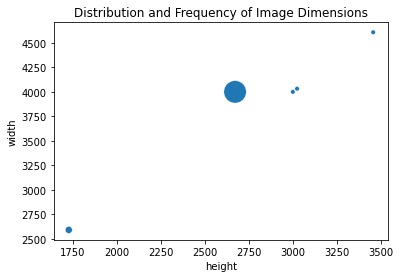

In [ ]:
# Distribution and Frequencey of Image Dimensions
import seaborn as sns
sns.scatterplot(x='height', y='width', data=sizes, size='count', sizes=(20, 500),legend = False).set(title="Distribution and Frequency of Image Dimensions")

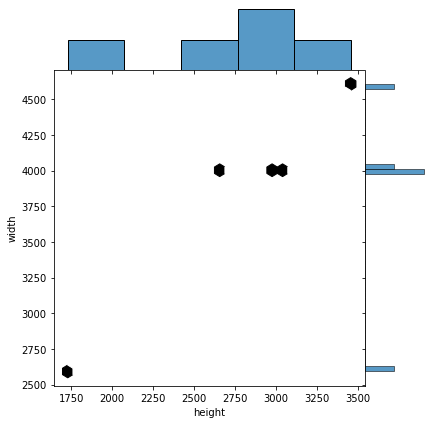

In [ ]:
# Jointplot of Image Dimensions
p = sns.jointplot(x='height', y='width', data=sizes, kind='hex',height=6, space=0)
#p.fig.suptitle("Jointplot of Image Dimensions")